In [1]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

#Cell_1.
import gc
import math
import pickle

import warnings
warnings.simplefilter('ignore')

import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
#Cell_2.
df_bp = pd.read_csv('public_stats/original/nhns_bp.csv', skiprows=6)

df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,Unnamed: 4,20-29歳,...,Unnamed: 16,（再掲）40-89歳,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,%,人数,...,%,人数,%,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,293",100.0,64,...,100.0,"1,125",100.0,NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0.0,0,0.0,NaN,NaN,NaN
3,NaN,NaN,90- 99,13,1,5,...,0.2,6,0.5,NaN,NaN,NaN
4,NaN,NaN,100-109,64,4.9,15,...,1.8,31,2.8,NaN,NaN,NaN


In [3]:
# Cell_3.
# 割合の情報は削除
# DataFrame 'df_bp' の列の中で、最初の行の値が '%' ではない列のみを抽出する。
# 具体的には、iloc[0] で最初の行のデータを取得し、そのデータが '%' と一致しない列名を df_bp.columns から選び出し、列をフィルタリングする。
df_bp = df_bp.loc[:, df_bp.columns[df_bp.iloc[0] != '%']]

# データの先頭5行を表示して、結果を確認する。
df_bp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,...,60-69歳,70歳以上,（再掲）40-89歳,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,人数,人数,人数,...,人数,人数,人数,NaN,NaN,NaN
1,男性,収縮期（最高）血圧,総数,"1,293",64,94,...,341,500,"1,125",NaN,NaN,NaN
2,NaN,NaN,90mmHg未満,0,0,0,...,0,0,0,NaN,NaN,NaN
3,NaN,NaN,90- 99,13,5,2,...,1,1,6,NaN,NaN,NaN
4,NaN,NaN,100-109,64,15,18,...,9,9,31,NaN,NaN,NaN


In [4]:
#Cell_4.
#10列目まで取り出す
# 最初の1行目を除いて、最初の10列までを選択した新しい DataFrame 'df_bp' を作成する。
# loc[1:, ...] は行のスライスで、1行目から最終行までを選択する。
# df_bp.columns[:10] は最初の10列を選択する。
df_bp = df_bp.loc[1:, df_bp.columns[:10]]

# 欠損値（NaN）を、直前の値で埋める。
# 'ffill' は「前方フィル」とも呼ばれ、前の行のデータで欠損値を埋める方法。
# これにより、欠損値が前の値で置き換えられる。
df_bp = df_bp.fillna(method='ffill')

# データの先頭5行を表示して、変更が正しく行われたかを確認する。
df_bp.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,総 数,20-29歳,30-39歳,40-49歳,50-59歳,60-69歳,70歳以上
1,男性,収縮期（最高）血圧,総数,"1,293",64,94,128,166,341,500
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,13,5,2,3,1,1,1
4,男性,収縮期（最高）血圧,100-109,64,15,18,9,4,9,9
5,男性,収縮期（最高）血圧,110-119,172,18,30,26,31,31,36


In [5]:
#Cell_5.
#列名を変更
df_bp.columns = ['sex', 'bp_type', 'bp_value', 'total',
                 '20s', '30s', '40s', '50s', '60s', '70s']

df_bp.tail()

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
48,女性,拡張期（最低）血圧,120-129,1,0,0,0,0,0,1
49,女性,拡張期（最低）血圧,130-139,0,0,0,0,0,0,0
50,女性,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
51,注１）血圧の測定を行った20歳以上の者を集計対象とした。,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0
52,注２）数値は２回の測定値の平均値を用いた。なお、１回しか測定できなかった者については、その値...,拡張期（最低）血圧,140ｍｍHg以上,0,0,0,0,0,0,0


In [6]:
# Cell_6.
# 51行目以下（単なる注釈）を削除する
# DataFrame 'df_bp' の最初の50行を選択し、新しい 'df_bp' として定義する。
# iloc[:50] は、最初の0行目から49行目（合計50行）を取得する。
df_bp = df_bp.iloc[:50]

# 'bp_value' 列の値が '総数' ではない行のみを抽出し、'df_bp' として再定義する。
# loc[df_bp.bp_value != '総数', :] で、条件に一致する行（'総数' を含まない行）を選択する。
df_bp = df_bp.loc[df_bp.bp_value != '総数', :]

# 'df_bp' DataFrame の先頭5行を表示して、処理が意図通りに行われたことを確認する。
display(df_bp.head())


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
2,男性,収縮期（最高）血圧,90mmHg未満,0,0,0,0,0,0,0
3,男性,収縮期（最高）血圧,90- 99,13,5,2,3,1,1,1
4,男性,収縮期（最高）血圧,100-109,64,15,18,9,4,9,9
5,男性,収縮期（最高）血圧,110-119,172,18,30,26,31,31,36
6,男性,収縮期（最高）血圧,120-129,251,18,24,35,32,63,79


In [7]:
#Cell_7.
df_bp.sex[df_bp.sex == '男性'] = 'M'
df_bp.sex[df_bp.sex == '女性'] = 'F'
df_bp.bp_type[df_bp.bp_type == '収縮期（最高）血圧'] = 'sbp'
df_bp.bp_type[df_bp.bp_type == '拡張期（最低）血圧'] = 'dbp'
df_bp = df_bp.reset_index()
del df_bp['index']

df_bp

,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s
0,M,sbp,90mmHg未満,0,0,0,0,0,0,0
1,M,sbp,90- 99,13,5,2,3,1,1,1
2,M,sbp,100-109,64,15,18,9,4,9,9
3,M,sbp,110-119,172,18,30,26,31,31,36
...,...,...,...,...,...,...,...,...,...,...
42,F,dbp,110-119,5,0,0,1,2,1,1
43,F,dbp,120-129,1,0,0,0,0,0,1
44,F,dbp,130-139,0,0,0,0,0,0,0
45,F,dbp,140ｍｍHg以上,0,0,0,0,0,0,0


In [8]:
# Cell_8.
# 可視化のための準備を行う。
# seaborn ライブラリをインポートする。これはデータの可視化に使用する。
import seaborn as sns

# 'df_bp' データフレームから、性別が 'M'（男性）で、血圧の種類が 'sbp'（収縮期血圧）のデータのみを抽出し、'df_m_sbp' として定義する。
df_m_sbp = df_bp[(df_bp['sex'] == 'F') & (df_bp['bp_type'] == 'sbp')]

# 'df_bp' データフレームから、性別が 'M'（男性）で、血圧の種類が 'dbp'（拡張期血圧）のデータのみを抽出し、'df_m_dbp' として定義する。
df_m_dbp = df_bp[(df_bp['sex'] == 'F') & (df_bp['bp_type'] == 'dbp')]

# 'df_m_sbp' データフレームに、新しい列 'bp_value_class' を追加する。
# この列には、収縮期血圧の値（85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185）が対応している。
df_m_sbp['bp_value_class'] = [85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185]

# 'df_m_dbp' データフレームに、新しい列 'bp_value_class' を追加する。
# この列には、拡張期血圧の値（35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145）が対応している。
df_m_dbp['bp_value_class'] = [35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145]

# 'df_m_dbp' データフレームの先頭5行を表示して、データを確認する。
display(df_m_dbp.head())

# 'df_m_dbp' データフレームの末尾5行を表示して、データを確認する。
display(df_m_dbp.tail())


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
34,F,dbp,40mmHg未満,0,0,0,0,0,0,0,35
35,F,dbp,40-49,3,0,1,0,0,0,2,45
36,F,dbp,50-59,65,7,14,9,7,7,21,55
37,F,dbp,60-69,340,36,55,59,41,45,104,65
38,F,dbp,70-79,664,22,63,112,102,136,229,75


,sex,bp_type,bp_value,total,20s,30s,40s,50s,60s,70s,bp_value_class
41,F,dbp,100-109,42,0,1,4,8,19,10,105
42,F,dbp,110-119,5,0,0,1,2,1,1,115
43,F,dbp,120-129,1,0,0,0,0,0,1,125
44,F,dbp,130-139,0,0,0,0,0,0,0,135
45,F,dbp,140ｍｍHg以上,0,0,0,0,0,0,0,145


In [9]:
#Cell_9.
print(df_m_sbp.info())
print(df_m_dbp.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 23 to 33
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             11 non-null     object
 1   bp_type         11 non-null     object
 2   bp_value        11 non-null     object
 3   total           11 non-null     object
 4   20s             11 non-null     object
 5   30s             11 non-null     object
 6   40s             11 non-null     object
 7   50s             11 non-null     object
 8   60s             11 non-null     object
 9   70s             11 non-null     object
 10  bp_value_class  11 non-null     int64 
dtypes: int64(1), object(10)
memory usage: 1.0+ KB
None
(12, 11)


In [10]:
# Cell_10.
# 'df_m_sbp' データフレームの 'total' 列のデータ型を整数型（int）に変換する。
# これにより、'total' 列の値が文字列（str）や浮動小数点（float）であっても、整数として扱われるようになる。
df_m_sbp['total'] = df_m_sbp['total'].astype("int")

# 'df_m_dbp' データフレームの 'total' 列のデータ型を整数型（int）に変換する。
# これにより、'total' 列の値が文字列（str）や浮動小数点（float）であっても、整数として扱われるようになる。
df_m_dbp['total'] = df_m_dbp['total'].astype("int")


<AxesSubplot:xlabel='bp_value_class'>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


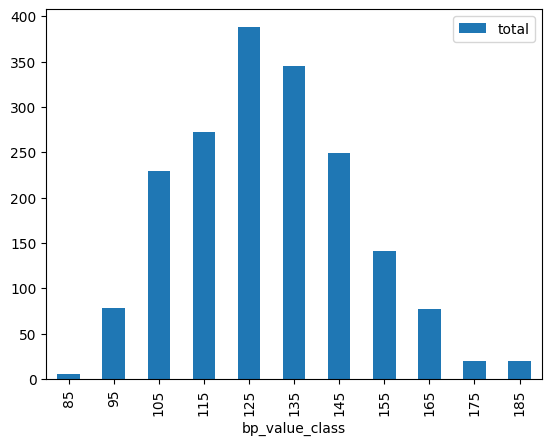

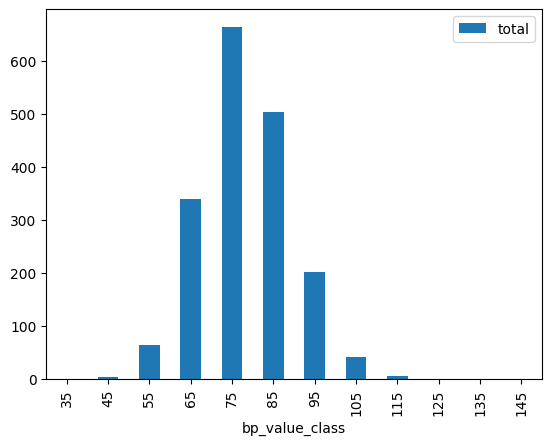

In [11]:
# Cell_11.
# Jupyter Notebook で matplotlib のグラフをインライン表示するためのマジックコマンド。
# このコマンドを使うと、グラフがノートブック内に直接表示されるようになる。
%matplotlib inline

# 'df_m_sbp' データフレームの棒グラフを作成する。
# 'x' 軸には 'bp_value_class' 列（収縮期血圧の値）を、'y' 軸には 'total' 列（各クラスの合計値）を使用する。
# 棒グラフは、収縮期血圧のクラスごとの合計値の分布を視覚的に確認するために使用される。
df_m_sbp.plot.bar(x='bp_value_class', y='total')

# 'df_m_dbp' データフレームの棒グラフを作成する。
# 'x' 軸には 'bp_value_class' 列（拡張期血圧の値）を、'y' 軸には 'total' 列（各クラスの合計値）を使用する。
# 棒グラフは、拡張期血圧のクラスごとの合計値の分布を視覚的に確認するために使用される。
df_m_dbp.plot.bar(x='bp_value_class', y='total')


In [12]:
# Cell_12.
# 'df_bp' データフレームの 'bp_value' 列に含まれるユニークな（重複しない）値の一覧を取得する。
# unique() メソッドを使用して、'bp_value' 列にどのような異なる値が含まれているかを確認できる。
# これは、データの中にどのような種類の血圧値が存在するかを把握するのに役立つ。
df_bp.bp_value.unique()


array(['90mmHg未満', '90- 99', '100-109', '110-119', '120-129', '130-139',
       '140-149', '150-159', '160-169', '170-179', '180mmHg以上',
       '40mmHg未満', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99',
       '140ｍｍHg以上'], dtype=object)